In [1]:
import polars as pl
import numpy as np
data_dir_local = '../datafiles'
data_dir_colab = 'https://raw.githubusercontent.com/utm529f/sukkiri-ml-codes-polars/main/datafiles'
data_dir = data_dir_local

## tsvファイルの読込

In [2]:
# NG:読み込めるが、1列になってしまう
df = pl.read_csv(f'{data_dir}/bike.tsv')
df.head()

dteday holiday weekday workingday weather_id cnt
str
"""2011-01-01 0 6 0 2 985"""
"""2011-01-02 0 0 0 2 801"""
"""2011-01-03 0 1 1 1 1349"""
"""2011-01-04 0 2 1 1 1562"""
"""2011-01-05 0 3 1 1 1600"""


In [3]:
# OK:separatorを指定する
df = pl.read_csv(f'{data_dir}/bike.tsv', separator="\t")
df.head()

dteday,holiday,weekday,workingday,weather_id,cnt
str,i64,i64,i64,i64,i64
"""2011-01-01""",0,6,0,2,985
"""2011-01-02""",0,0,0,2,801
"""2011-01-03""",0,1,1,1,1349
"""2011-01-04""",0,2,1,1,1562
"""2011-01-05""",0,3,1,1,1600


## shift-jis の読込

In [4]:
# NG:エラーになる
try:    
    df2 = pl.read_csv(f'{data_dir}/weather.csv')
except Exception as e:
    print(e)

invalid utf-8 sequence


In [5]:
# OK:utf-8ではない場合、encodingを指定する
weather = pl.read_csv(f'{data_dir}/weather.csv', encoding="shift-jis")
weather

weather_id,weather
i64,str
1,"""晴れ"""
2,"""曇り"""
3,"""雨"""


## index付きレコードJSONの読込
polarsには、`read_json` / `read_ndjson` といった読込モジュールが存在するが、2025/11/23時点ではキーが数値のオブジェクトとしてトップレベルに構成されたJSONファイル（レコード指向やインデックス付きレコードと呼ばれる形式）を直接読み込むことはできない。

In [6]:
# NG:atempなどのindexの情報は落ちてしまい1行になってしまう
temp = pl.read_json(f'{data_dir}/temp.json')
temp

227,298,138,563,193,557,218,167,99,601,263,26,319,343,571,352,582,625,566,58,435,705,264,32,117,156,121,63,37,198,638,556,316,338,313,586,104,…,656,374,531,655,233,651,280,318,185,142,143,75,184,217,259,355,393,436,467,505,474,102,36,542,669,672,4,690,197,210,220,646,98,363,97,564,11
struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],…,struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5],struct[5]
"{0.666671,""2011-08-17"",0.575417,0.723333,0.143667}","{0.457046,""2011-10-27"",0.812917,0.47,0.197763}","{0.510742,""2011-05-19"",0.829583,0.530833,0.108213}","{0.745583,""2012-07-18"",0.577083,0.793333,0.137442}","{0.689404,""2011-07-13"",0.631667,0.746667,0.146133}","{0.654683,""2012-07-12"",0.529583,0.715833,0.146775}","{0.703283,""2011-08-08"",0.592083,0.765,0.192175}","{0.600383,""2011-06-17"",0.735833,0.649167,0.143029}","{0.426737,""2011-04-10"",0.8575,0.426667,0.146767}","{0.618696,""2012-08-25"",0.712917,0.661667,0.244408}","{0.554963,""2011-09-22"",0.902083,0.628333,0.128125}","{0.2197,""2011-01-27"",0.6875,0.195,0.113837}","{0.323221,""2011-11-17"",0.575833,0.341667,0.305362}","{0.253154,""2011-12-11"",0.49,0.220833,0.0665417}","{0.739263,""2012-07-26"",0.596667,0.776667,0.284813}","{0.396454,""2011-12-20"",0.595417,0.385833,0.0615708}","{0.710246,""2012-08-06"",0.654167,0.7525,0.129354}","{0.565067,""2012-09-18"",0.8725,0.623333,0.357587}","{0.549912,""2012-07-21"",0.865417,0.595833,0.2133}","{0.400118,""2011-02-28"",0.876364,0.407273,0.289686}","{0.459592,""2012-03-12"",0.489167,0.466667,0.207713}","{0.321958,""2012-12-07"",0.764167,0.320833,0.1306}","{0.522125,""2011-09-23"",0.9725,0.609167,0.0783667}","{0.254417,""2011-02-02"",0.775417,0.26,0.264308}","{0.578929,""2011-04-28"",0.700833,0.6175,0.320908}","{0.621858,""2011-06-06"",0.6,0.678333,0.121896}","{0.532833,""2011-05-02"",0.73,0.549167,0.183454}","{0.378779,""2011-03-05"",0.789167,0.384167,0.251871}","{0.303658,""2011-02-07"",0.738333,0.271667,0.0454083}","{0.703925,""2011-07-18"",0.65125,0.746667,0.215804}","{0.512,""2012-10-01"",0.649167,0.520833,0.0908042}","{0.650271,""2012-07-11"",0.633333,0.716667,0.151733}","{0.524612,""2011-11-14"",0.587083,0.53,0.306596}","{0.4564,""2011-12-06"",0.949583,0.4625,0.232583}","{0.306817,""2011-11-11"",0.44625,0.324167,0.314675}","{0.667942,""2012-08-10"",0.715833,0.715833,0.238813}","{0.441913,""2011-04-15"",0.67125,0.446667,0.226375}",…,"{0.537896,""2012-10-19"",0.815,0.563333,0.134954}","{0.282821,""2012-01-11"",0.8475,0.274167,0.131221}","{0.594708,""2012-06-16"",0.504167,0.631667,0.166667}","{0.512625,""2012-10-18"",0.728333,0.5225,0.236937}","{0.606067,""2011-08-23"",0.455417,0.640833,0.146763}","{0.508204,""2012-10-14"",0.640417,0.521667,0.278612}","{0.523983,""2011-10-09"",0.7275,0.540833,0.06345}","{0.451988,""2011-11-16"",0.93,0.456667,0.136829}","{0.696338,""2011-07-05"",0.590417,0.746667,0.126258}","{0.590296,""2011-05-23"",0.81,0.631667,0.233842}","{0.604813,""2011-05-24"",0.740833,0.66,0.207092}","{0.410333,""2011-03-17"",0.602917,0.415,0.209579}","{0.665417,""2011-07-04"",0.637917,0.726667,0.0814792}","{0.715292,""2011-08-07"",0.752917,0.7425,0.201487}","{0.490537,""2011-09-18"",0.695,0.5075,0.178483}","{0.377513,""2011-12-23"",0.68625,0.373333,0.274246}","{0.262625,""2012-01-30"",0.400833,0.269167,0.215792}","{0.542929,""2012-03-13"",0.6175,0.565,0.23695}","{0.431808,""2012-04-13"",0.408333,0.4

In [7]:
# OK:jsonでパースしてリスト形式にしてからpolarsに渡す
import json
with open(f'{data_dir}/temp.json', 'r', encoding='utf-8') as file:
    python_object_simple = json.load(file)

records_list = list(python_object_simple.values())
temp = pl.DataFrame(records_list)
temp

atemp,dteday,hum,temp,windspeed
f64,str,f64,f64,f64
0.363625,"""2011-01-01""",0.805833,0.344167,0.160446
0.353739,"""2011-01-02""",0.696087,0.363478,0.248539
0.189405,"""2011-01-03""",0.437273,0.196364,0.248309
0.212122,"""2011-01-04""",0.590435,0.2,0.160296
0.22927,"""2011-01-05""",0.436957,0.226957,0.1869
…,…,…,…,…
0.226642,"""2012-12-27""",0.652917,0.254167,0.350133
0.255046,"""2012-12-28""",0.59,0.253333,0.155471
0.2424,"""2012-12-29""",0.752917,0.253333,0.124383


In [8]:
df2 = df.join(weather, how="inner", on="weather_id")
df2.head(2)

dteday,holiday,weekday,workingday,weather_id,cnt,weather
str,i64,i64,i64,i64,i64,str
"""2011-01-01""",0,6,0,2,985,"""曇り"""
"""2011-01-02""",0,0,0,2,801,"""曇り"""


In [9]:
df2.group_by("weather").agg(pl.col('cnt').mean())

weather,cnt
str,f64
"""曇り""",4052.672065
"""晴れ""",4876.786177
"""雨""",1803.285714


In [10]:
# 上から 199, 200, 201行目をスライスすると、2011-07-20が抜けている
temp[199:202]

atemp,dteday,hum,temp,windspeed
f64,str,f64,f64,f64
0.747479,"""2011-07-19""",0.650417,0.776667,0.1306
0.826371,"""2011-07-21""",0.69125,0.815,0.222021
null,"""2011-07-22""",0.580417,0.848333,0.1331


In [11]:
df2.filter(pl.col('dteday')=='2011-07-20')

dteday,holiday,weekday,workingday,weather_id,cnt,weather
str,i64,i64,i64,i64,i64,str
"""2011-07-20""",0,3,1,1,4332,"""晴れ"""


In [12]:
df3 = df2.join(temp, how="left", on="dteday")
df3.filter(pl.col('dteday')=='2011-07-20')

dteday,holiday,weekday,workingday,weather_id,cnt,weather,atemp,hum,temp,windspeed
str,i64,i64,i64,i64,i64,str,f64,f64,f64,f64
"""2011-07-20""",0,3,1,1,4332,"""晴れ""",null,null,null,null


In [13]:
%matplotlib inline
df3["temp"].plot.line()

alt.Chart(...)

In [14]:
df3_plt = df3.with_row_index("index")
df3_plt = df3_plt.unpivot(
    index=["index"],           # 識別子として残す列 (X軸)
    on=["temp", "hum"],  # 値として変換する列
    variable_name="category",    # 新しいカテゴリ列の名前
    value_name="value"           # 新しい値列の名前 (Y軸)
)
df3_plt.plot.line(x='index', y="value", color='category:N')

alt.Chart(...)

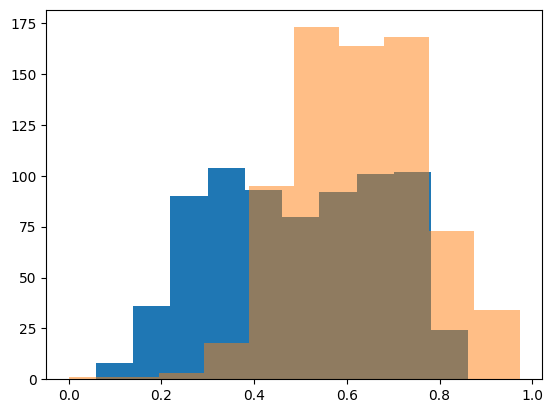

In [15]:
# ヒストグラムはpolarsのplot関数だけでは難しい
import matplotlib.pyplot as plt

plt.hist(df3['temp'], label='temp')
plt.hist(df3['hum'], alpha=0.5, label='hum')
plt.show()

In [16]:
df3["atemp"].null_count()

3

In [17]:
# 欠損値の確認
df3["atemp"][190:211].plot.line()

alt.Chart(...)

In [18]:
# atemp列のdtypeをfloatに変換して欠損値補間
df3 = df3.with_columns(pl.col('atemp').cast(pl.Float64).interpolate())
df3["atemp"][190:211].plot.line()

alt.Chart(...)

In [19]:
iris_df = pl.read_csv(f'{data_dir}/iris.csv')
non_df = iris_df.drop_nulls() # 欠損値を含む行を削除

from sklearn.linear_model import LinearRegression
x = non_df[:,"がく片幅":"花弁幅" ]
t = non_df['がく片長さ']
model = LinearRegression()
model.fit(x, t) # 欠損値予測のためのモデルを予測

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
iris_df.filter(pl.col('がく片長さ').is_null())

がく片長さ,がく片幅,花弁長さ,花弁幅,種類
f64,f64,f64,f64,str
null,0.42,0.65,0.58,"""Iris-versicolor"""
null,0.46,0.57,0.71,"""Iris-virginica"""


In [21]:
# 欠損行の抜き出し
non_data = iris_df.filter(pl.col('がく片長さ').is_null())

# 欠損行の入力に利用する特徴量だけを抜き出して、モデルで予測
x = non_data[:,"がく片幅":"花弁幅"]
pred = model.predict(x)

# 欠損行のがく片長さ(cm)のマスを抜き出して、predで代入
null_indices = iris_df.select(pl.col('がく片長さ').is_null().arg_true()).to_series().to_list()
list_x = iris_df['がく片長さ'].to_list()
for idx, val in zip(null_indices, pred):
    list_x[idx] = val
    
iris_df = iris_df.with_columns(pl.Series(list_x).alias('がく片長さ'))

In [22]:
from sklearn.covariance import MinCovDet

#数値列を適当に取り出す
df4 = df3[:,"atemp":"windspeed"]
df4 = df4.drop_nulls()#欠損値を削除

#df4に対して、各データの中心点からのマハラノビス距離を計算

mcd = MinCovDet(random_state=0, support_fraction=0.7)
mcd.fit(df4)
#マハラノビス距離
distance = mcd.mahalanobis(df4)
distance

array([5.28685919e+00, 2.93958299e+00, 1.08873903e+01, 3.91777267e+00,
       5.83743181e+00, 6.85979161e+00, 4.57807325e+00, 1.12294313e+01,
       3.07879561e+01, 1.07350024e+01, 4.93484073e+00, 1.74968772e+01,
       1.87331329e+01, 5.32729180e+00, 3.61541859e+00, 4.80173345e+00,
       8.21213444e+00, 6.79836643e+00, 2.87299048e+00, 5.25717722e+00,
       2.34832751e+01, 1.17927956e+01, 1.49622820e+01, 8.00089913e+00,
       3.82116490e+00, 2.10012092e+01, 4.47041230e+00, 5.45651259e+00,
       3.90883119e+00, 7.18467288e+00, 6.26114495e+00, 1.11698504e+01,
       8.91683812e+00, 1.31862666e+01, 3.78816752e+00, 9.40980352e+00,
       2.37017046e+00, 9.05455392e+00, 2.15907661e+01, 8.24295918e+00,
       9.58859635e+00, 5.84834138e+00, 3.26204050e+00, 4.28450181e+00,
       1.48613074e+01, 1.14032754e+01, 4.13782899e+00, 1.84042916e+00,
       4.70582846e+00, 3.26061846e+01, 5.97687800e+00, 1.00266113e+01,
       6.60674933e+00, 8.23738671e+00, 4.97949164e+00, 9.40472950e+00,
      

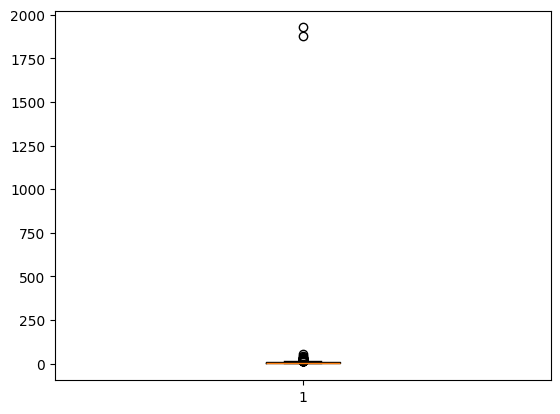

In [23]:
distance = pl.Series(distance)
plt.boxplot(distance)
plt.show()

In [24]:
tmp = distance.describe()#様々な基本統計量を計算
tmp

statistic,value
str,f64
"""count""",730.0
"""null_count""",0.0
"""mean""",10.627559
"""std""",99.403456
"""min""",0.187189
"""25%""",2.311055
"""50%""",3.803068
"""75%""",6.560852
"""max""",1927.352267


In [25]:
percentile_25 = tmp.filter(pl.col("statistic") == "25%").select('value').item()
percentile_75 = tmp.filter(pl.col("statistic") == "75%").select('value').item()
IQR = percentile_75 - percentile_25 # IQR計算
jougen = 1.5 * (IQR) + percentile_75 # 上限値
kagen = percentile_25 - 1.5*(IQR) # 下限値

# 上限と下限の条件をもとに、シリーズで条件検索
outliner = distance.filter((distance > jougen) | (distance < kagen))
outliner

""
f64
30.787956
17.496877
18.733133
23.483275
14.962282
…
14.674746
24.727324
23.899808


# 演習問題

In [26]:
import polars as pl
from sklearn import tree
from sklearn.model_selection import train_test_split
%matplotlib inline

In [27]:
df = pl.read_csv(f'{data_dir}/Bank.csv')
print(df.shape)
df.head()

(27128, 16)


id,age,job,marital,education,default,amount,housing,loan,contact,day,month,duration,campaign,previous,y
i64,i64,str,str,str,str,f64,str,str,str,i64,str,f64,i64,i64,i64
1,39,"""blue-collar""","""married""","""secondary""","""no""",1756.0,"""yes""","""no""","""cellular""",3,"""apr""",370.055237,1,0,1
2,51,"""entrepreneur""","""married""","""primary""","""no""",1443.0,"""no""","""no""","""cellular""",18,"""feb""",233.998933,10,0,1
3,36,"""management""","""single""","""tertiary""","""no""",436.0,"""no""","""no""","""cellular""",13,"""apr""",null,1,2,0
4,63,"""retired""","""married""","""secondary""","""no""",474.0,"""no""","""no""","""cellular""",25,"""jan""",252.525808,1,0,0
5,31,"""management""","""single""","""tertiary""","""no""",354.0,"""no""","""no""","""cellular""",30,"""apr""",null,1,2,0


In [28]:
# まず、ダミー変数化をしたいが、文字列の列が複数あるので抜き出す。
str_col_name = ['job', 'default', 'marital', 'education', 'housing', 'loan', 'contact', 'month']
str_df = df[str_col_name]
# 複数列を一気にダミー変数化
str_df2 = str_df.to_dummies(drop_first=True)

num_df = df.drop(str_col_name) # 数値列を抜き出す
df2 = pl.concat([num_df, str_df2, str_df], how='horizontal') # 結合(今後の集計の利便性も考慮してstr_dfも結合しておく)

In [29]:
# 訓練&検証データとテストデータに分割
train_val, test = train_test_split(df2,test_size=0.1, random_state=9)
train_val.head()

id,age,amount,day,duration,campaign,previous,y,job_admin.,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,default_yes,marital_divorced,marital_single,education_primary,education_tertiary,education_unknown,housing_no,loan_yes,contact_sending _document,contact_telephone,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,job,default,marital,education,housing,loan,contact,month
i64,i64,f64,i64,f64,i64,i64,i64,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,str,str,str,str,str,str,str,str
13379,46,0.0,10,378.293875,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"""unemployed""","""no""","""married""","""tertiary""","""yes""","""no""","""cellular""","""jul"""
3801,41,-333.0,30,300.845752,3,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,"""blue-collar""","""no""","""divorced""","""secondary""","""yes""","""no""","""cellular""","""jan"""
10399,30,5389.0,6,159.053623,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,"""management""","""no""","""single""","""tertiary""","""no""","""no""","""cellular""","""aug"""
23402,39,255.0,5,334.802583,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,"""management""","""no""","""single""","""tertiary""","""yes""","""no""","""sending _document""","""may"""
26224,47,33.0,5,null,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"""services""","""no""","""single""","""secondary""","""yes""","""no""","""cellular""","""may"""


In [30]:
#欠損値の確認
is_nan = train_val.null_count()
#欠損が存在している列だけ表示
null_col_name = [
    col for col in is_nan.columns 
    if is_nan[col].ge(1).any()
]
is_nan.select(pl.col(null_col_name))

duration
u32
6331


## 改善案1  欠損値の補完方法を線形回帰で行ってみる。

In [31]:
pl.Config.set_tbl_rows(50)

num_col_name = [c for c in train_val.columns if c not in str_col_name]

(train_val
    .drop_nulls('duration')
    .select(num_col_name)
    .corr()
    .select(
        pl.Series(num_col_name).alias('column'),
        pl.col('duration').abs()
    )
    .sort(by='duration', descending=True)
)

column,duration
str,f64
"""duration""",1.0
"""housing_no""",0.556899
"""loan_yes""",0.372579
"""y""",0.277575
"""age""",0.207738
"""month_aug""",0.18731
"""month_may""",0.184593
"""marital_single""",0.164614
"""previous""",0.143538


In [32]:
# 特徴量の当たりがついた
# しかし、そもそもこの線形回帰は外れ値の影響を強く受けるので調べる。
num_df = train_val.drop(str_col_name)
num_df2 = num_df.drop('id').drop_nulls()
mcd2 = MinCovDet(random_state=0, support_fraction=0.7)
mcd2.fit(num_df2)

,store_precision,True
,assume_centered,False
,support_fraction,0.7
,random_state,0


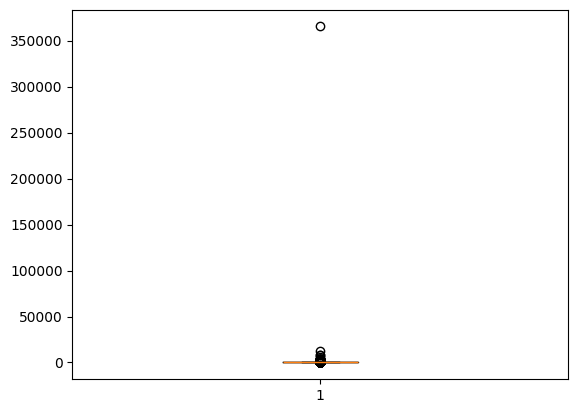

In [33]:
dis = mcd2.mahalanobis(num_df2)
dis = pl.Series(dis)
plt.boxplot(dis)
plt.show()

In [34]:
exclude_df = (num_df
    .drop_nulls()
    .select(
        pl.col('id'),
        pl.Series(dis).alias('distance')
    )
    .filter(pl.col('distance') > 300000)
)
exclude_df

id,distance
i64,f64
3141,365357.889998


In [35]:
# id=3141 が外れ値となる事が分かったので除外
exclude_ids = exclude_df['id'].to_list()
train_val2 = num_df.filter(~(pl.col('id').is_in(exclude_ids)))

In [36]:
num_col_name = [c for c in train_val.columns if c not in str_col_name]
num_col_name.remove('id')

(train_val2
    .drop_nulls('duration')
    .select(num_col_name)
    .corr()
    .select(
        pl.Series(num_col_name).alias('column'),
        pl.col('duration').abs()
    )
    .sort(by='duration', descending=True)
)

column,duration
str,f64
"""duration""",1.0
"""housing_no""",0.559269
"""loan_yes""",0.374871
"""y""",0.279582
"""age""",0.208929
"""month_aug""",0.188017
"""month_may""",0.186111
"""marital_single""",0.165022
"""job_student""",0.108389


- month は durationに本質的に影響あるとは思えないので特徴量を housing_no, loan_yes, age, marital_single, job_student とする。（ｙは最終的な正解データなので除外）

In [37]:
#欠損行を削除
not_nan_df = train_val2.drop_nulls()
temp_t = not_nan_df['duration']
temp_x = not_nan_df[['housing_no', 'loan_yes', 'age', 'marital_single', 'job_student']]
# 線形回帰
from sklearn.linear_model import LinearRegression
model_liner = LinearRegression()

a, b, c, d = train_test_split(temp_x, temp_t, random_state=0, test_size=0.2)

#今回は予測させたいだけなので、標準化はしない
model_liner.fit(a, c)
print('train_score, valid_score')
print(model_liner.score(a, c), model_liner.score(b, d))

train_score, valid_score
0.7271253237617876 0.7154980171805085


In [38]:
is_null = train_val2['duration'].is_null()
non_x = (train_val2
    .filter(is_null)
    .select(['housing_no', 'loan_yes', 'age', 'marital_single', 'job_student'])
)
pred_d = model_liner.predict(non_x)

# 欠損行を抜き出して、pred_dで代入
null_indices = train_val2.select(is_null.arg_true()).to_series().to_list()
list_x = train_val2['duration'].to_list()
for idx, val in zip(null_indices, pred_d):
    list_x[idx] = val
    
train_val2 = train_val2.with_columns(pl.Series(list_x).alias('duration'))

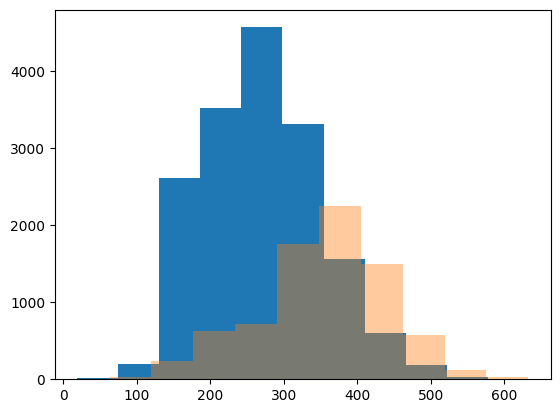

In [39]:
#ヒストグラムの確認
plt.hist(train_val2.filter(pl.col('y')==0)['duration'], label='y=0')
plt.hist(train_val2.filter(pl.col('y')==1)['duration'], label='y=1', alpha=0.4)
plt.show()

- y=1の方が、durationが大きい傾向がやっぱりありそう

In [40]:
# まず、さくっと学習できるようなlearn関数を定義する。
def learn(x, t, i):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size=0.2, random_state=13)

    datas = [x_train, x_val, y_train, y_val]
    #不均衡データに対応できるように、class_weight引数も設定
    model = tree.DecisionTreeClassifier(random_state=i, max_depth=i, class_weight='balanced')
    model.fit(x_train, y_train)
    train_score = model.score(x_train, y_train)
    
    val_score = model.score(x_val, y_val)
    return train_score, val_score, model,datas

In [41]:
t = train_val2['y']
x = train_val2.drop(['id', 'y', 'day'])

In [42]:
#とりあえず、for文で様々な木の深さでの正解率を調べてみる
print('max_depth, train_score, val_score')
for i in range(1,15):
    s1, s2, model,datas = learn(x, t, i)
    print(i, s1, s2)

max_depth, train_score, val_score
1 0.7436383185704777 0.7651034200286709
2 0.674517433823153 0.6807290600040958
3 0.7416926936664789 0.7569117345893918
4 0.6975065280835595 0.7034609870980955
5 0.7592545184578363 0.7653082121646528
6 0.7422047002201628 0.745033790702437
7 0.7773795504582459 0.7773909481875896
8 0.8083047463007527 0.7943886954740937
9 0.8227433311146383 0.802170796641409
10 0.8440940044032563 0.8064714314970305
11 0.8592493983922994 0.7993037067376613
12 0.8741999897598689 0.792545566250256
13 0.8945778505964876 0.7956174482899857
14 0.9083508268905842 0.7896784763465083


In [43]:
# テストデータでも調べる
test2 = test.clone()
isnull = test2['duration'].is_null()
model_tree = tree.DecisionTreeClassifier(random_state=10, max_depth=10, class_weight="balanced")
if isnull.sum()>0:
    temp_x = (test2
        .filter(isnull)
        .select(['housing_no', 'loan_yes', 'age', 'marital_single', 'job_student'])
    )
    pred_d = model_liner.predict(temp_x)
    null_indices = test2.select(isnull.arg_true()).to_series().to_list()
    list_x = test2['duration'].to_list()
    for idx, val in zip(null_indices, pred_d):
        list_x[idx] = val
    test2 = test2.with_columns(pl.Series(list_x).alias('duration'))

x_test = test2.drop(str_col_name)
x_test = x_test.drop(['id','y','day'])
y_test = test['y']

model.score(x_test,y_test)

0.7795798009583487

- 9章の最後より若干低下している

In [44]:
# どのような間違い方をしているのか確認
s1, s2, model, datas = learn(x, t, 9)

#訓練データでの予測結果と実際の値の2軸で個数集計flagがFalseならば、検証データで集計
def syuukei(model, datas, flag=False):
    if flag:
        x_val = datas[0]
        y_val = datas[2]
    else:
        x_val = datas[1]
        y_val = datas[3]

    if 'id' in x_val.columns:
        x_val = x_val.drop('id')

    pre = model.predict(x_val)
    data = {
        "pred": pre,
        "true": y_val
    }
    tmp = pl.DataFrame(data)
    return tmp, tmp.pivot(index="true", on="pred", values="true", aggregate_function='len')

tmp, a = syuukei(model, datas, False)
a.select(pl.col(['true', '0', '1']))

true,0,1
i64,u32,u32
0,2645,701
1,265,1272


## 訓練データと検証データの間違い型の傾向を調べる

In [45]:
def plot_2_bars_by_mean(false_df, true_df):
    labels = false_df.columns
    false_means = false_df.mean().transpose().to_series()
    true_means = true_df.mean().transpose().to_series()

    # 棒グラフの幅を定義
    width = 0.35

    # バーを左右にずらして描画
    x = np.arange(len(labels))
    rects1 = plt.bar(x - width/2, false_means, width, label='False')
    rects2 = plt.bar(x + width/2, true_means, width, label='True')
    plt.xticks(x, labels, rotation=90)
    plt.ylabel('Mean Value')
    plt.legend()
    plt.tight_layout()
    plt.show()

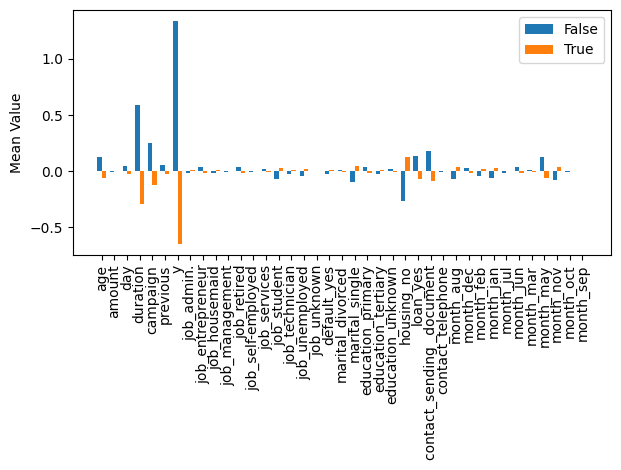

In [46]:
# 値にばらつきが大きいので、標準化してもう一度グラフ化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
tmp2 = train_val2.drop(['id'])
sc_data = sc.fit_transform(tmp2)
sc_df = pl.DataFrame(sc_data, schema=tmp2.columns)
sc_df = pl.concat([train_val2.select(pl.col('id')), sc_df], how='horizontal')

######挿入箇所#######
pre = model.predict(sc_df.drop(["id", "day", "y"]))
target = tmp2["y"].to_numpy()
true = (pre == target)
false = (pre!= target)
############

true_df = sc_df.filter(true).drop('id')
false_df = sc_df.filter(false).drop('id')
# temp2=pd.concat([false_df.mean()["age":],true_df.mean()["age":]],axis=1)

plot_2_bars_by_mean(false_df, true_df)

In [47]:
print(train_val.group_by('loan').agg(pl.col('y').mean()))
print(train_val.group_by('housing').agg(pl.col('y').mean()))

shape: (2, 2)
┌──────┬──────────┐
│ loan ┆ y        │
│ ---  ┆ ---      │
│ str  ┆ f64      │
╞══════╪══════════╡
│ yes  ┆ 0.424328 │
│ no   ┆ 0.300195 │
└──────┴──────────┘
shape: (2, 2)
┌─────────┬──────────┐
│ housing ┆ y        │
│ ---     ┆ ---      │
│ str     ┆ f64      │
╞═════════╪══════════╡
│ no      ┆ 0.217959 │
│ yes     ┆ 0.40091  │
└─────────┴──────────┘


In [48]:
train_val3 = train_val2.clone()
train_val3 = train_val3.with_columns(
    (pl.col('duration') * pl.col('housing_no')).alias('du*hou'),
    (pl.col('duration') * pl.col('loan_yes')).alias('du*loan'),
    (pl.col('duration') * pl.col('age')).alias('du*age'),
)

In [49]:
t = train_val3['y']

monthcol = [c for c in train_val3.columns if c.startswith('month_')]
jobcol = [c for c in train_val3.columns if c.startswith('job_')]

x = train_val3.drop(jobcol)
x = x.drop(monthcol)
x = x.drop(['id','y','day'])
x.columns

['age',
 'amount',
 'duration',
 'campaign',
 'previous',
 'default_yes',
 'marital_divorced',
 'marital_single',
 'education_primary',
 'education_tertiary',
 'education_unknown',
 'housing_no',
 'loan_yes',
 'contact_sending _document',
 'contact_telephone',
 'du*hou',
 'du*loan',
 'du*age']

In [50]:
#とりあえず、for文で様々な木の深さでの正解率を調べてみる
print('max_depth, train_score, val_score')
for i in range(5,15):
    s1,s2,model,datas = learn(x,t,i)
    print(i,s1,s2)

max_depth, train_score, val_score
5 0.7329885822538529 0.7282408355519148
6 0.7740515078593005 0.77329510546795
7 0.8009318519277047 0.7986893303297153
8 0.8179304695100097 0.8038091337292648
9 0.8294506169678972 0.8027851730493549
10 0.8458348266857816 0.8087241449928323
11 0.8637038554093492 0.8042187180012288
12 0.879729660539655 0.8050378865451566
13 0.8995443141672214 0.8048330944091747
14 0.9111668629358456 0.801761212369445


In [51]:
s1, s2, model,datas = learn(x, t, 9)
tmp, a = syuukei(model, datas, False)
a.select(pl.col(['true', '0', '1']))

true,0,1
i64,u32,u32
0,2644,702
1,261,1276


In [52]:
print('特徴量重要度')
pl.DataFrame(
    [x.columns, model.feature_importances_],
    schema=['column', 'feature_importances']
).sort(by='feature_importances', descending=True)

特徴量重要度


column,feature_importances
str,f64
"""duration""",0.49562
"""campaign""",0.139536
"""age""",0.116945
"""du*hou""",0.074895
"""du*loan""",0.053377
"""du*age""",0.049921
"""amount""",0.019163
"""contact_sending _document""",0.01876
"""loan_yes""",0.012557


In [53]:
i = 9
model = tree.DecisionTreeClassifier(random_state=i, max_depth=i, class_weight="balanced")
model.fit(x, t)

,criterion,'gini'
,splitter,'best'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,9
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [54]:
#テストデータでも調べる
test2 = test.clone()
isnull = test2['duration'].is_null()
if isnull.sum()>0:
    temp_x = (test2
        .filter(isnull)
        .select(['housing_no', 'loan_yes', 'age', 'marital_single', 'job_student'])
    )
    pred_d = model_liner.predict(temp_x)
    null_indices = test2.select(isnull.arg_true()).to_series().to_list()
    list_x = test2['duration'].to_list()
    for idx, val in zip(null_indices, pred_d):
        list_x[idx] = val
    test2 = test2.with_columns(pl.Series(list_x).alias('duration'))

test2 = test2.with_columns(
    (pl.col('duration') * pl.col('housing_no')).alias('du*hou'),
    (pl.col('duration') * pl.col('loan_yes')).alias('du*loan'),
    (pl.col('duration') * pl.col('age')).alias('du*age'),
)

x_test = test2.drop(str_col_name)
x_test = x_test.drop(jobcol)
x_test = x_test.drop(monthcol)
x_test = x_test.drop(['id','y','day'])
y_test = test['y']
x_test.columns
model.score(x_test,y_test)

0.7803169922594914

- 直観的に考えて、9章では、housingとloanで集計しており、今回の線形回帰では、それらの列も含まれているから、durationの性能はよりよくなるはず、でも全体のモデルの正解率は1%ほど低下している
- 原因の仮説
    1. 現状の線形回帰だと訓練&検証に過学習してしまい、テストデータにフィットしない。（そもそもテストデータではdurationがあまり関係していない？？）
    2. 純粋な決定木の限界？
    3. 現在考慮していない特徴量ももっとしっかりした方が良いのか？？

次以降の章で仮説1,2について検討できるので、次章に続く。